
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

**Exploración y Curación de Datos**

---
## Trabajo práctico entregable - Parte 1

* Adriano Antonello
* Gabriel Delgado
* Pablo Casas

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Lectura del dataset



In [56]:
df_melb = pd.read_csv('melb_data.csv')
df_melb[:5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [57]:
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [58]:
df_melb['date'] = pd.to_datetime(df_melb.Date)

## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

In [82]:
#Descomprimir el .zip
df_melb_dec18 = pd.read_csv('cleansed_listings_dec18.csv')

C:\Users\gabyd\anaconda3\envs\Diplo\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [60]:
pd.unique(df_melb.Suburb.sort_values())

array(['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale',
       'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows',
       'Altona North', 'Ardeer', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Aspendale', 'Aspendale Gardens', 'Attwood',
       'Avondale Heights', 'Bacchus Marsh', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bayswater', 'Bayswater North', 'Beaconsfield',
       'Beaconsfield Upper', 'Beaumaris', 'Bellfield', 'Bentleigh',
       'Bentleigh East', 'Berwick', 'Black Rock', 'Blackburn',
       'Blackburn North', 'Blackburn South', 'Bonbeach', 'Boronia',
       'Box Hill', 'Braybrook', 'Briar Hill', 'Brighton', 'Brighton East',
       'Broadmeadows', 'Brookfield', 'Brooklyn', 'Brunswick',
       'Brunswick East', 'Brunswick West', 'Bulleen', 'Bullengarook',
       'Bundoora', 'Burnley', 'Burnside', 'Burnside Heights', 'Burwood',
       'Burwood East', 'Cairnlea', 'Camberwell', 'Campbellfield',
       'Canterbury', 'Carlton', 'Carlton Nor

In [61]:
df_melb.Suburb.value_counts()

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

In [62]:
pd.unique(df_melb.Rooms.sort_values())

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10], dtype=int64)

In [63]:
df_melb.sort_values(by=['Landsize'], ascending=False)[:5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,date
11020,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,...,1.0,433014.0,NaN,NaN,Yarra,-37.79751,144.98309,Northern Metropolitan,5825.0,2017-12-08
10504,Silvan,16 Eleanor Dr,3,h,1085000.0,S,Harcourts,27/05/2017,34.6,3795.0,...,2.0,76000.0,NaN,NaN,Yarra Ranges,-37.84739,145.47052,Eastern Victoria,457.0,2017-05-27
687,Balwyn North,9 Gildan St,3,h,2000000.0,VB,Kay,28/08/2016,9.2,3104.0,...,2.0,75100.0,NaN,NaN,Boroondara,-37.80020,145.07000,Southern Metropolitan,7809.0,2016-08-28
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,...,5.0,44500.0,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0,2017-09-23
5194,Reservoir,14 Beenak St,3,h,572000.0,S,Ray,23/04/2016,11.2,3073.0,...,2.0,41400.0,NaN,NaN,Darebin,-37.71040,145.02570,Northern Metropolitan,21650.0,2016-04-23


In [64]:
df_melb.sort_values(by=['BuildingArea'], ascending=False)[:5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,date
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,...,5.0,44500.0,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0,2017-09-23
1484,Bulleen,19 Warringal St,4,h,1280000.0,S,Barry,11/03/2017,11.8,3105.0,...,2.0,732.0,6791.0,NaN,Manningham,-37.76150,145.08970,Eastern Metropolitan,4480.0,2017-11-03
2560,Fitzroy North,186 Queens Pde,2,t,930000.0,S,Nelson,3/09/2016,3.5,3068.0,...,0.0,2778.0,3558.0,NaN,Yarra,-37.79030,144.98590,Northern Metropolitan,6244.0,2016-03-09
1588,Camberwell,46 Athelstan Rd,5,h,2608000.0,S,Marshall,15/10/2016,7.8,3124.0,...,4.0,730.0,3112.0,1920.0,Boroondara,-37.84240,145.06390,Southern Metropolitan,8920.0,2016-10-15
2234,Elsternwick,5/16 St Georges Rd,2,u,741000.0,S,Biggin,16/04/2016,8.5,3185.0,...,1.0,0.0,1561.0,1966.0,Glen Eira,-37.88290,145.00330,Southern Metropolitan,4898.0,2016-04-16


In [65]:
df_melb.sort_values(by=['YearBuilt'], ascending=True)[:5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,date
9968,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3149.0,...,4.0,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366.0,2017-06-24
2079,Collingwood,2/79 Oxford St,2,u,855000.0,S,Nelson,3/09/2016,1.6,3066.0,...,1.0,2886.0,122.0,1830.0,Yarra,-37.80420,144.98450,Northern Metropolitan,4553.0,2016-03-09
5860,St Kilda,51/167 Fitzroy St,3,u,1600000.0,PI,Kay,25/02/2017,6.1,3182.0,...,2.0,0.0,3.0,1850.0,Port Phillip,-37.85840,144.98020,Southern Metropolitan,13240.0,2017-02-25
4843,Prahran,602/220 Commercial Rd,2,u,841000.0,S,hockingstuart,18/03/2017,4.5,3181.0,...,1.0,0.0,101.0,1850.0,Stonnington,-37.84700,144.99360,Southern Metropolitan,7717.0,2017-03-18
2554,Fitzroy,11 Henry St,2,h,677000.0,S,Chambers,27/11/2016,1.6,3065.0,...,0.0,67.0,NaN,1850.0,Yarra,-37.79690,144.97590,Northern Metropolitan,5825.0,2016-11-27


<AxesSubplot:>

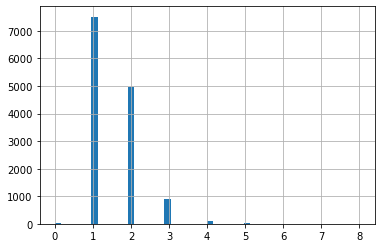

In [66]:
df_melb.Bathroom.hist(bins=50)

<AxesSubplot:>

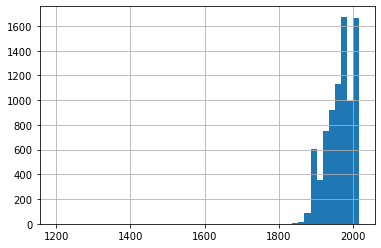

In [67]:
df_melb.YearBuilt.hist(bins=50)

<AxesSubplot:>

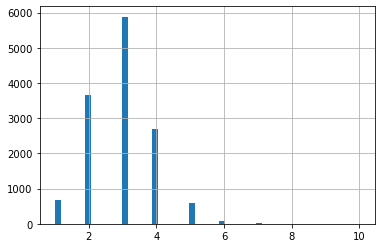

In [68]:
df_melb.Rooms.hist(bins=50)

### Se eliminan valores atípicos y se crea un df final ###

In [69]:
df_melb_final = df_melb.drop(index=[11020,13245,9968])
df_melb_final = df_melb_final.query('(Bathroom > 0) & (Bathroom < 6)')
df_melb_final

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,date
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,2016-03-12
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,2016-04-02
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,2017-04-03
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,2017-04-03
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,2016-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,2017-08-26
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,2017-08-26
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,2017-08-26
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,2017-08-26


## Ejercicio 1.2 ##

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

<AxesSubplot:xlabel='Method', ylabel='Price'>

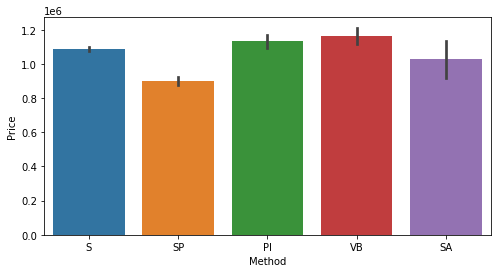

In [70]:
plt.subplots(figsize=(8,4))
sns.barplot(x=df_melb_final.Method, y=df_melb_final.Price)

<AxesSubplot:>

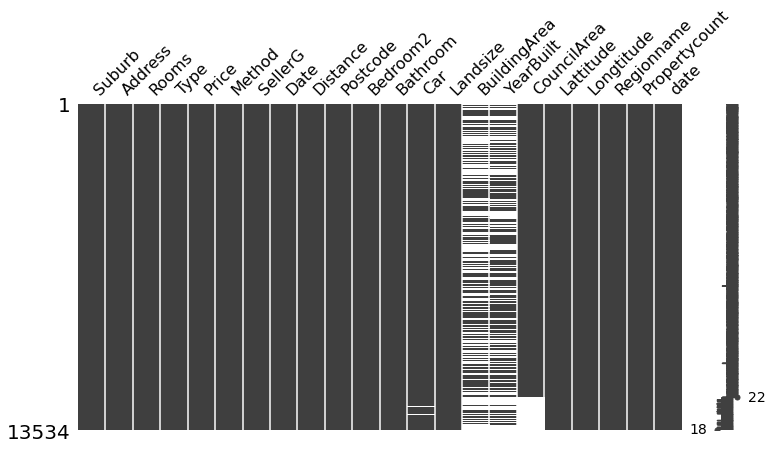

In [71]:
msno.matrix(df_melb_final,figsize=(12, 6))

In [72]:
df_melb_final.Type.value_counts()

h    9422
u    3000
t    1112
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='Car'>

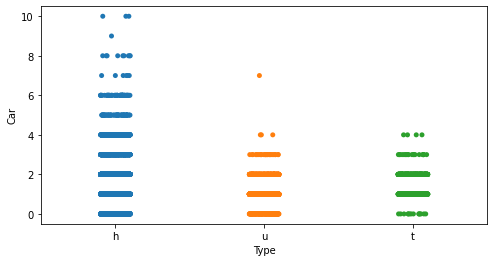

In [73]:
plt.subplots(figsize=(8,4))
sns.stripplot(x=df_melb_final.Type, y=df_melb_final.Car)

<AxesSubplot:>

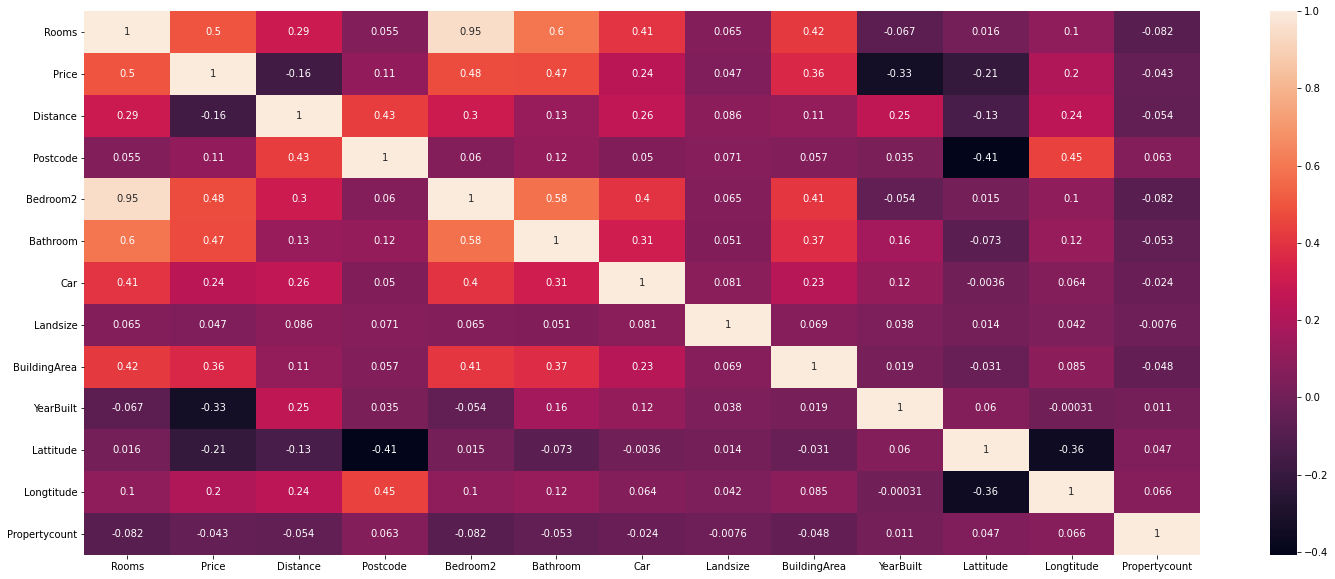

In [74]:
plt.figure(figsize=(25, 10))
sns.heatmap(df_melb_final.corr(method='pearson'), annot = True)

### Eliminamos las columnas numericas con poca relevancia ###

In [75]:
#Borramos columnas numéricas poco relevantes
df_melb_final = df_melb_final.drop(['Bedroom2'], axis=1)
df_melb_final = df_melb_final.drop(['Landsize'], axis=1)

Detectamos una alta correlación entre "Rooms" y "Bedroom2", por lo que decidimos eliminar una. La seleccionada fue Bedroom2 ya que es la que tiene una menor correlación con el precio, que es la variable objeto de estudio.

También decidimos eliminar las columnas Landsize y YearBuilt debido a que tienen una correlación con el precio cercana a 0.

Yearbuilt tiene una correlación significativa, pero al tener gran cantidad de valores nulos y siendo una variable difícil de inferir, también la eliminamos

**Update** : La column YearBuilt se mantuvo debido a que se utilizará en un ejercicio posterior. De todas formas dejamos el código comentado.

In [76]:
airbnb_df_final = df_melb_dec18[['description', 'neighborhood_overview','street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode','price', 'weekly_price', 'monthly_price','latitude', 'longitude']]

In [77]:
airbnb_df_final

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,price,weekly_price,monthly_price,latitude,longitude
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,60,NaN,NaN,-37.772684,145.092133
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,35,200.0,803.0,-37.766505,144.980736
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,159,1253.0,4452.0,-37.859755,144.977369
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,50,250.0,920.0,-37.758971,144.989228
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,69,400.0,1900.0,-37.864530,144.992238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,"near city, near tram station",NaN,"Carlton, VIC, Australia",Carlton,Melbourne,Carlton,VIC,3053.0,55,NaN,NaN,-37.802415,144.962967
22891,"Close to: Melton Rail, Coles, Coffee Lounge an...",NaN,"Melton South, VIC, Australia",NaN,Melton,Melton South,VIC,3338.0,129,NaN,NaN,-37.705095,144.574474
22892,"Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,"Glen Waverley, VIC, Australia",NaN,Monash,Glen Waverley,VIC,3150.0,53,NaN,NaN,-37.875252,145.162757
22893,Immaculately presented and carefully maintaine...,A plethora of Melbourne highlights are just a ...,"Southbank, VIC, Australia",Southbank,Melbourne,Southbank,VIC,3006.0,130,NaN,NaN,-37.827795,144.954987


Seleccionamos las columnas price, city y zipcode. city podría ser usada para imputar CouncilArea y el precio de alquiler.

In [78]:
pd.unique(airbnb_df_final.zipcode)

array(['3105', '3057', '3182', '3071', '3183', '3806', '3073', '3002',
       '3166', '3199', '3121', '3000', '3187', '3101', '3065', '3188',
       '3068', '3195', '3070', '3207', '3205', '3181', '3135', '3052',
       '3004', '3013', '3160', '3777', '3079', '3184', '3149', '3206',
       '3123', '3053', '3161', '3094', '3056', '3046', '3051', '3066',
       '3006', '3141', '3130', '3023', '3159', '3162', '3030', '3167',
       '3186', '3067', '3015', '3143', '3103', '3910', '3980', '3029',
       '3084', '3185', '3144', '3145', '3031', '3104', '3012', '3072',
       '3191', '3058', '3074', '3775', '3163', nan, '30122', '3147',
       '3789', '3175', '3099', '3018', '3011', '3078', '3788', '3107',
       '3042', '3040', '3178', '3134', '3089', '3142', '3911', '3168',
       '3008', '3129', '3146', '3190', '3088', '3193', '3131', '3204',
       '3032', '3109', '3797', '3782', '3003', 'VIC 3161', '3113', '3081',
       '3158', '3122', '3136', '3140', '3076', '3153', '3977', '3044',
    

In [79]:
pd.unique(airbnb_df_final.city)

array(['Manningham', 'Moreland', 'Port Phillip', 'Darebin', 'Casey',
       'Melbourne', 'Monash', 'Frankston', 'Yarra', 'Bayside',
       'Boroondara', 'Kingston', 'Stonnington', 'Glen Eira', 'Maroondah',
       'Maribyrnong', 'Yarra Ranges', 'Banyule', 'Whitehorse', 'Melton',
       'Brimbank', 'Hobsons Bay', 'Wyndham', 'Moonee Valley',
       'Whittlesea', 'Greater Dandenong', 'Nillumbik', 'Knox', 'Cardinia',
       'Hume'], dtype=object)

In [80]:
airbnb_df_final['zipcode'] = pd.to_numeric(airbnb_df_final.zipcode, errors='coerce')

<ipython-input-80-3a562b5f1292>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_df_final['zipcode'] = pd.to_numeric(airbnb_df_final.zipcode, errors='coerce')


In [81]:
airbnb_df_final.to_csv('airbnb_df_final.csv', index=False)